In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Hipertensión Arterial en México

## Lectura y despliegue de información de la base de datos

In [ ]:
dataHipertention = pd.read_csv('hipertension-arterial-mexico.csv')

In [ ]:
dataHipertention.head()

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0


In [ ]:
dataHipertention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FOLIO_I                           4363 non-null   object 
 1   sexo                              4363 non-null   int64  
 2   edad                              4363 non-null   int64  
 3   concentracion_hemoglobina         4363 non-null   float64
 4   temperatura_ambiente              4363 non-null   int64  
 5   valor_acido_urico                 4363 non-null   float64
 6   valor_albumina                    4363 non-null   float64
 7   valor_colesterol_hdl              4363 non-null   int64  
 8   valor_colesterol_ldl              4363 non-null   float64
 9   valor_colesterol_total            4363 non-null   int64  
 10  valor_creatina                    4363 non-null   float64
 11  resultado_glucosa                 4363 non-null   float64
 12  valor_

## Grafica Concentración de Trigliceridos
Esta representación nos muestra que los valores de los trigliceridos tiene más valores entre 0 y 200.

In [ ]:
df = dataHipertention['valor_trigliceridos']

<Figure size 1000x400 with 0 Axes>

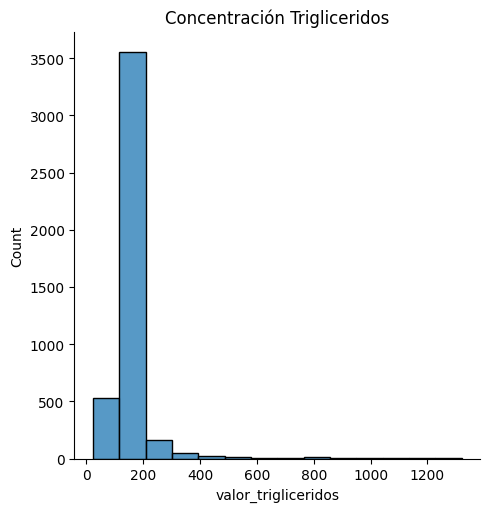

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(df)
plt.title("Concentración Trigliceridos")
sns.despine()
plt.show()

## Busqueda de Outliers en los Trigliceridos

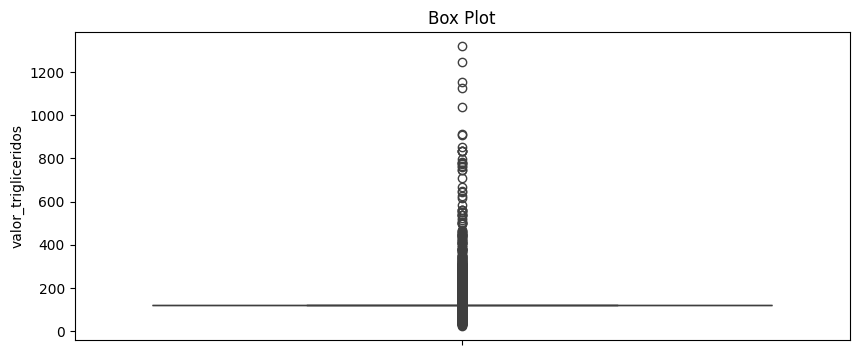

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Box Plot")
sns.boxplot(df)
plt.show()

<Figure size 1000x400 with 0 Axes>

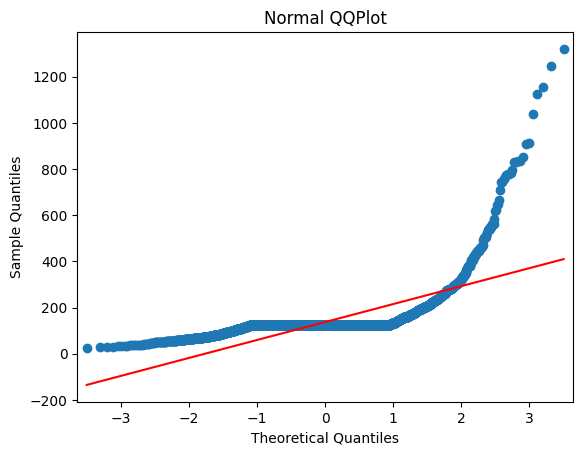

In [ ]:
plt.figure(figsize=(10,4))
qqplot(df,line='s')
plt.title("Normal QQPlot")
plt.show()


## ¿Cuáles son los outliers y cuántos son?

In [ ]:
out = []
def Zscore_outlier(df,umbral):
  mean = np.mean(df)
  standarDesviation = np.std(df)
  for i in df:
      z = (i - mean) / standarDesviation
      if np.abs(z) > umbral:
        out.append(i)
  print("Outliers: ",out)
  return out
outliers = Zscore_outlier(df,umbral=3)

Outliers:  [376, 379, 452, 382, 507, 443, 438, 563, 773, 563, 408, 445, 423, 431, 835, 563, 440, 1040, 390, 832, 453, 456, 393, 500, 797, 446, 777, 582, 550, 432, 408, 382, 767, 373, 550, 1245, 758, 624, 445, 832, 499, 524, 540, 423, 375, 744, 835, 409, 470, 649, 745, 516, 417, 463, 461, 784, 618, 1320, 408, 852, 778, 1124, 910, 441, 501, 540, 418, 494, 407, 1154, 382, 400, 466, 667, 710, 536, 644, 381, 914, 537]


In [ ]:
print(len(outliers))

80


## Gráfica Concentración de Tensión Arterial

In [ ]:
df = dataHipertention['tension_arterial']

<Figure size 1000x400 with 0 Axes>

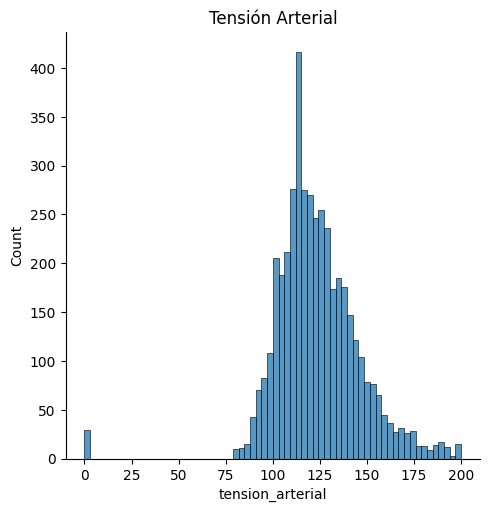

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(df)
plt.title("Tensión Arterial")
sns.despine()
plt.show()

## Busqueda de Outliers en la Tensión Arterial

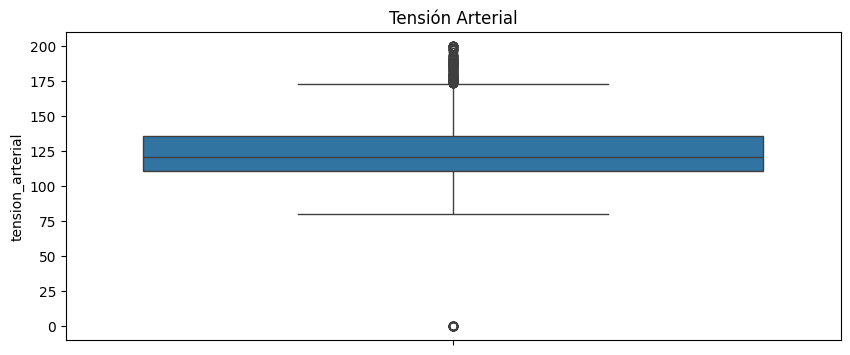

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Tensión Arterial")
sns.boxplot(df)
plt.show()

<ipython-input-120-3230c7287f71>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


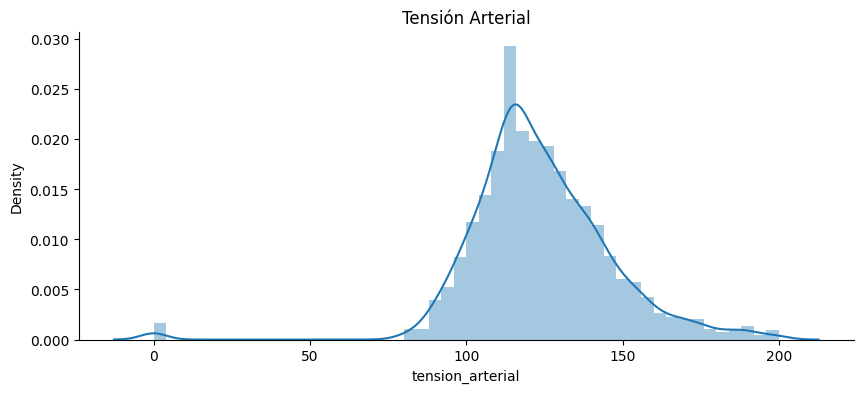

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(df)
plt.title("Tensión Arterial")
sns.despine()
plt.show()


## ¿Cuáles son los outliers y cuántos son?

In [ ]:
outliers = Zscore_outlier(df,umbral=3)

Outliers:  [376, 379, 452, 382, 507, 443, 438, 563, 773, 563, 408, 445, 423, 431, 835, 563, 440, 1040, 390, 832, 453, 456, 393, 500, 797, 446, 777, 582, 550, 432, 408, 382, 767, 373, 550, 1245, 758, 624, 445, 832, 499, 524, 540, 423, 375, 744, 835, 409, 470, 649, 745, 516, 417, 463, 461, 784, 618, 1320, 408, 852, 778, 1124, 910, 441, 501, 540, 418, 494, 407, 1154, 382, 400, 466, 667, 710, 536, 644, 381, 914, 537, 0, 0, 0, 193, 198, 0, 0, 0, 200, 193, 193, 200, 200, 0, 0, 0, 198, 199, 194, 0, 200, 0, 0, 192, 0, 0, 0, 199, 0, 197, 194, 0, 0, 0, 0, 0, 198, 192, 0, 200, 0, 197, 0, 200, 200, 0, 196, 0, 0, 200, 0, 0, 193]


In [ ]:
outliers.sort()
print(outliers)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 192, 192, 193, 193, 193, 193, 194, 194, 196, 197, 197, 198, 198, 198, 199, 199, 200, 200, 200, 200, 200, 200, 200, 200, 373, 375, 376, 379, 381, 382, 382, 382, 390, 393, 400, 407, 408, 408, 408, 409, 417, 418, 423, 423, 431, 432, 438, 440, 441, 443, 445, 445, 446, 452, 453, 456, 461, 463, 466, 470, 494, 499, 500, 501, 507, 516, 524, 536, 537, 540, 540, 550, 550, 563, 563, 563, 582, 618, 624, 644, 649, 667, 710, 744, 745, 758, 767, 773, 777, 778, 784, 797, 832, 832, 835, 835, 852, 910, 914, 1040, 1124, 1154, 1245, 1320]


# COVID-19 en Brazil

## Lectura y despliegue de información de la base de datos

In [ ]:
brazilCovid = pd.read_csv('brazil-covid19.csv')

In [ ]:
brazilCovid.head()

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0


In [ ]:
brazilCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1008 non-null   object
 1   hour      684 non-null    object
 2   state     1008 non-null   object
 3   suspects  1008 non-null   int64 
 4   refuses   1008 non-null   int64 
 5   cases     1008 non-null   object
 6   deaths    1008 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 55.2+ KB


# Terrorismo Global

## Lectura y despliegue de información de la base de datos

In [ ]:
terrorismoGlobal = pd.read_csv('global-terrorism.csv',encoding='latin-1')

<ipython-input-126-de8b786cd3cf>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorismoGlobal = pd.read_csv('global-terrorism.csv',encoding='latin-1')


In [ ]:
terrorismoGlobal.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
terrorismoGlobal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


## Revisión de datos faltantes
Se desea saber cual de las siguientes caracteristicas tiene un porcentaje mayor a 25% de datos faltantes.

In [ ]:
features = ['INT_ANY','approxdate','INT_MISC','INT_LOG']

In [ ]:
terrorismoGlobal[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   INT_ANY     181691 non-null  int64 
 1   approxdate  9239 non-null    object
 2   INT_MISC    181691 non-null  int64 
 3   INT_LOG     181691 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ MB


Revisamos la suma de los datos faltantes para las caracteristicas mencionadas

In [ ]:
missing_values_count = terrorismoGlobal[features].isnull().sum()
missing_values_count

,0
INT_ANY,0
approxdate,172452
INT_MISC,0
INT_LOG,0


In [ ]:
value = 'approxdate'
missing_values_count = terrorismoGlobal[value].isnull().sum()
missing_values_count

172452

In [ ]:
missing_values_count = terrorismoGlobal[value].isnull()
total_cells = np.product(terrorismoGlobal[value].shape)
total_missing = missing_values_count.sum()


In [ ]:
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

94.91499303762983


<Axes: >

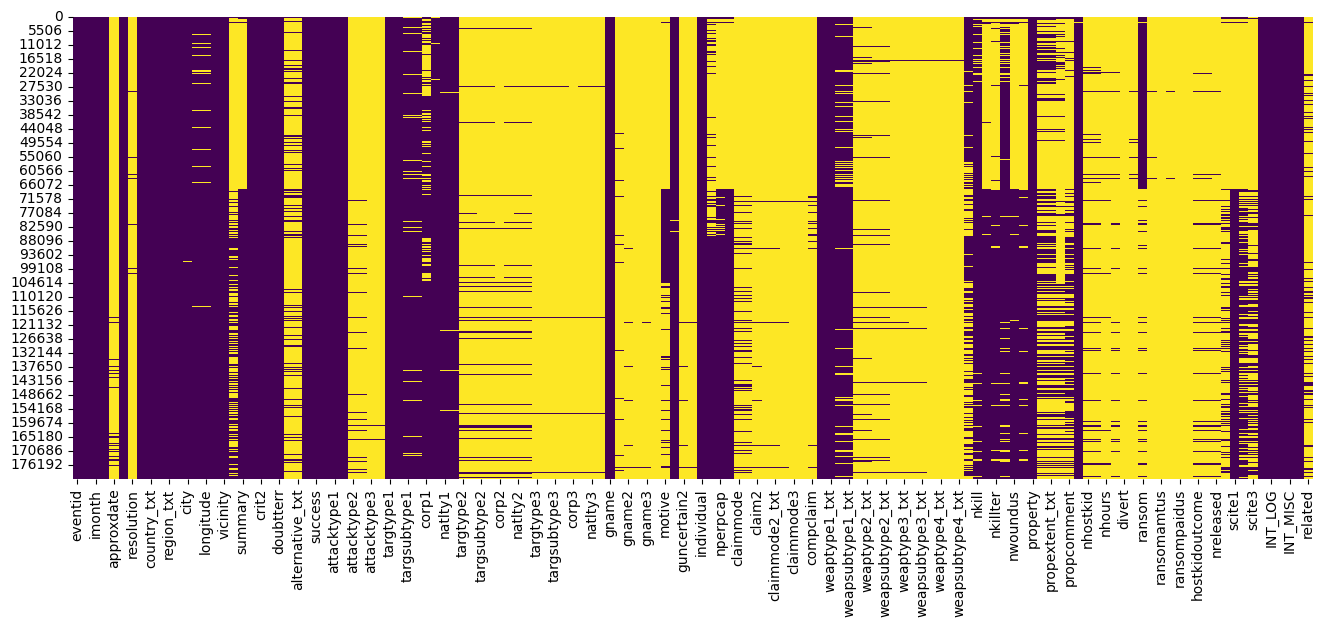

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(terrorismoGlobal.isnull(),cmap='viridis',cbar=False)

In [ ]:
# Esta funcion calcula el porcentaje de datos vacios en cada columna y regresa
# una lista de nombres donde el porcentaje fue mayor que 25%
emptyColumns = []
def nanPercent(df,percent):
  for column in df.columns:
    total_cells = np.product(df[column].shape)
    missing_values_count = terrorismoGlobal[column].isnull()
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_cells)*100
    print("{0:20}{1:20.5f}".format(column,percent_missing))
    if(percent_missing > percent):
      emptyColumns.append(column)
  return emptyColumns

In [ ]:
emptyPercentData = nanPercent(terrorismoGlobal,percent=25)

<ipython-input-137-80a1c84ed6f2>:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  emptyPercentData = nanPercent(terrorismoGlobal,percent=25)


eventid                          0.00000
iyear                            0.00000
imonth                           0.00000
iday                             0.00000
approxdate                      94.91499
extended                         0.00000
resolution                      98.77815
country                          0.00000
country_txt                      0.00000
region                           0.00000
region_txt                       0.00000
provstate                        0.23171
city                             0.23942
latitude                         2.50755
longitude                        2.50810
specificity                      0.00330
vicinity                         0.00000
location                        69.45638
summary                         36.39641
crit1                            0.00000
crit2                            0.00000
crit3                            0.00000
doubtterr                        0.00055
alternative                     84.03278
alternative_txt 

In [ ]:
print(emptyPercentData)

['approxdate', 'resolution', 'location', 'summary', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 

In [ ]:
newData = terrorismoGlobal.drop(emptyPercentData,axis=1)

<Axes: >

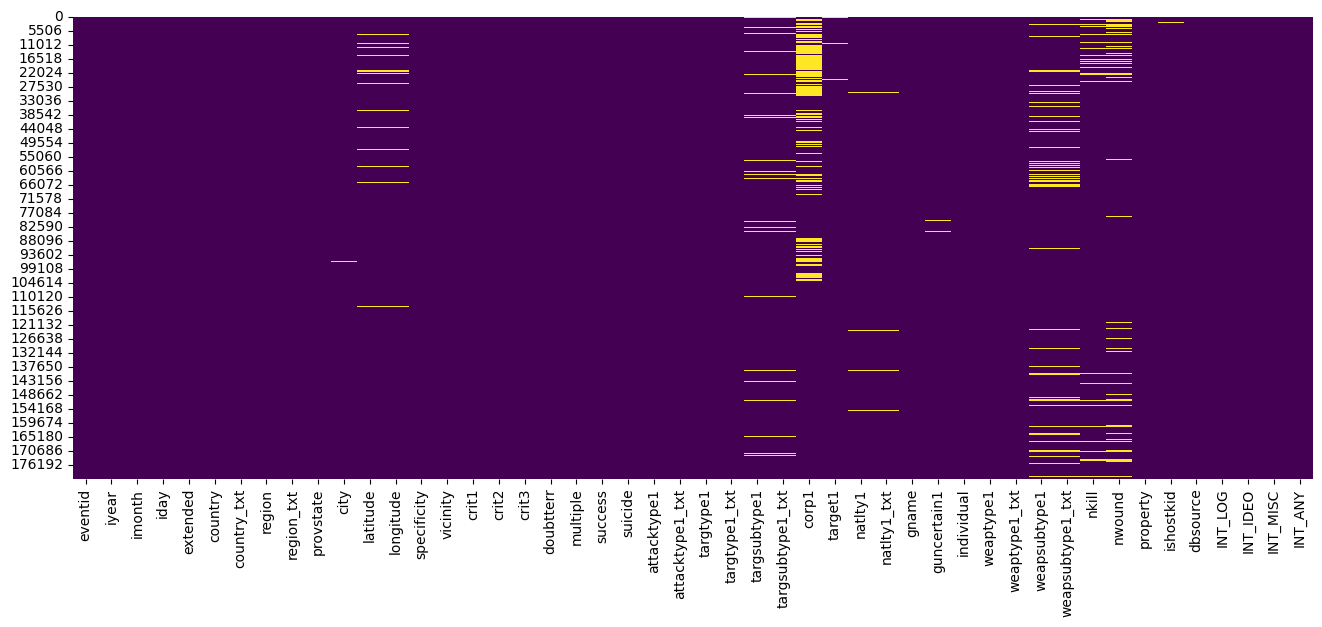

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(newData.isnull(),cmap='viridis',cbar=False)

In [ ]:
newDataV2 = terrorismoGlobal.dropna(axis='columns')

In [ ]:
missing_values_count = newDataV2.isnull().sum()
missing_values_count

,0
eventid,0
iyear,0
imonth,0
iday,0
extended,0
country,0
country_txt,0
region,0
region_txt,0
vicinity,0


In [ ]:
newDataV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

<Axes: >

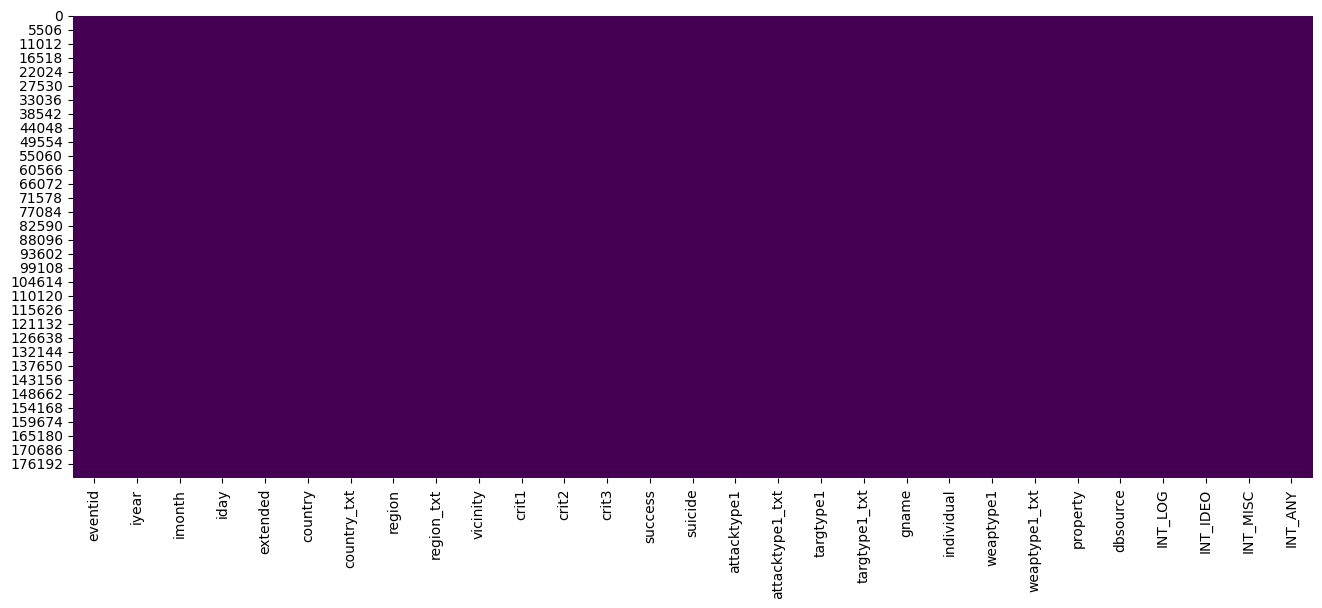

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(newDataV2.isnull(),cmap='viridis',cbar=False)

In [ ]:
len(newDataV2['extended'])

181691